In [10]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from itertools import combinations
from Activity_mining import *
import Funcs as f
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

In [11]:
log = xes_importer.apply(f"cluster 0.xes")
traces = [[event["concept:name"] for event in trace] for trace in log]

parsing log, completed traces ::   0%|          | 0/101 [00:00<?, ?it/s]

In [12]:
print("=" * 70)
print("DEMONSTRATION: Global Trace Segmentation Algorithm")
print("=" * 70)

DEMONSTRATION: Global Trace Segmentation Algorithm


In [13]:
print(f"\n1. INPUT EVENT LOG")
print("-" * 70)
print(f"Number of traces: {len(traces)}")
print(f"\nSample traces:")
for i, trace in enumerate(traces[:3]):
    print(f"  Trace {i+1}: {' → '.join(trace)}")
print(f"  ...")


1. INPUT EVENT LOG
----------------------------------------------------------------------
Number of traces: 101

Sample traces:
  Trace 1: functstat_100% -no complaints → vintage_0.0-2.26 → rpvd_No → dhtn2_No-hypertension → dhcv_Neg → ragetx_65.0-66.0 → esrddxsimp_GN → DON-RACE-SRTR_WHITE → dage_5-21 → dcd_No → predict0
  Trace 2: functstat_100% -no complaints → vintage_0.0-2.26 → rpvd_No → dhtn2_No-hypertension → dhcv_Neg → ragetx_65.0-66.0 → esrddxsimp_Other → DON-RACE-SRTR_WHITE → dage_5-21 → rhtn_No → predict0
  Trace 3: functstat_100% -no complaints → vintage_0.0-2.26 → rpvd_No → dhtn2_No-hypertension → dhcv_Neg → ragetx_65.0-66.0 → esrddxsimp_Other → DON-RACE-SRTR_WHITE → dage_22-34 → rhtn_No → predict0
  ...


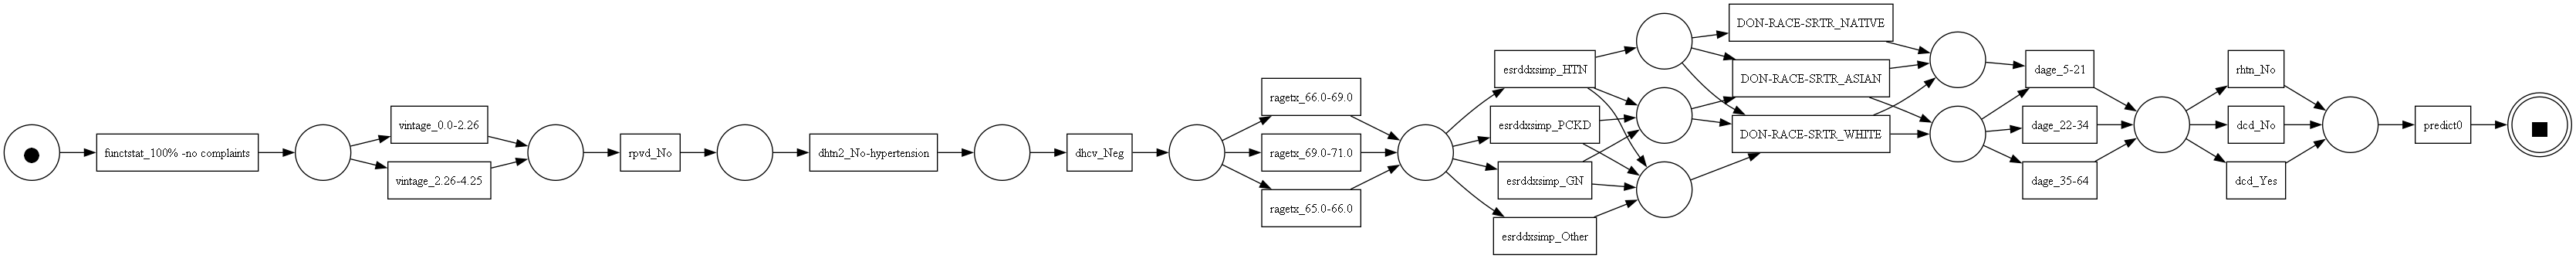

In [14]:
log = f.trace2eventlog(traces)
net, im, fm = pm4py.discover_petri_net_alpha(log)
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [15]:
# Initialize and fit the model
print(f"\n\n2. FITTING THE MODEL")
print("-" * 70)
model = GlobalTraceSegmentation(window_size=6, attenuation_factor=0.8)
model.fit(traces)



2. FITTING THE MODEL
----------------------------------------------------------------------
Fitting model on 101 traces...
Phase 1: Scanning event class correlations...
  ✓ Correlation matrix built (23 x 23)
Phase 2: Building cluster hierarchy...
  ✓ Hierarchy built with 22 levels
✓ Model fitted successfully. Found 23 event classes.


In [16]:
# Show correlation matrix
print(f"\n\n3. EVENT CLASS CORRELATION MATRIX")
print("-" * 70)
corr_df = model.get_correlation_matrix()
print("\nTop 5x5 section of correlation matrix:")
print(corr_df.iloc[:5, :5].round(2))
print("\n(Higher values indicate stronger co-occurrence patterns)")



3. EVENT CLASS CORRELATION MATRIX
----------------------------------------------------------------------

Top 5x5 section of correlation matrix:
                      DON-RACE-SRTR_ASIAN  DON-RACE-SRTR_NATIVE  \
DON-RACE-SRTR_ASIAN                   0.0                   0.0   
DON-RACE-SRTR_NATIVE                  0.0                   0.0   
DON-RACE-SRTR_WHITE                   0.0                   0.0   
dage_22-34                            0.8                   0.0   
dage_35-64                            4.0                   0.0   

                      DON-RACE-SRTR_WHITE  dage_22-34  dage_35-64  
DON-RACE-SRTR_ASIAN                   0.0         0.8         4.0  
DON-RACE-SRTR_NATIVE                  0.0         0.0         0.0  
DON-RACE-SRTR_WHITE                   0.0        20.8        28.0  
dage_22-34                           20.8         0.0         0.0  
dage_35-64                           28.0         0.0         0.0  

(Higher values indicate stronger co-occur

In [17]:
# Save full correlation matrix
corr_df.round(3).to_csv('correlation_matrix.csv')
print("\n✓ Full correlation matrix saved to 'correlation_matrix.csv'")


✓ Full correlation matrix saved to 'correlation_matrix.csv'


In [18]:
# Show hierarchy summary
print(f"\n\n4. CLUSTER HIERARCHY STRUCTURE")
print("-" * 70)
hierarchy_summary = model.plot_hierarchy_summary()
print(hierarchy_summary.to_string(index=False))



4. CLUSTER HIERARCHY STRUCTURE
----------------------------------------------------------------------
 Level  Number_of_Clusters  Avg_Cluster_Size  Max_Cluster_Size
     0                  23          1.000000                 1
     1                  22          1.045455                 2
     2                  21          1.095238                 2
     3                  20          1.150000                 3
     4                  19          1.210526                 3
     5                  18          1.277778                 3
     6                  17          1.352941                 5
     7                  16          1.437500                 5
     8                  15          1.533333                 5
     9                  14          1.642857                 5
    10                  13          1.769231                 5
    11                  12          1.916667                 5
    12                  11          2.090909                 6
    13        

In [20]:
# Save hierarchy summary
hierarchy_summary.to_csv('hierarchy_summary.csv', index=False)
print("\n✓ Hierarchy summary saved to 'hierarchy_summary.csv'")


✓ Hierarchy summary saved to 'hierarchy_summary.csv'


In [21]:
# Show cluster information at different levels
print(f"\n\n5. CLUSTER COMPOSITION AT DIFFERENT ABSTRACTION LEVELS")
print("-" * 70)
for level in hierarchy_summary['Level']:
    if level < len(model.cluster_levels):
        print(f"\nLevel {level}:")
        cluster_info = model.get_cluster_info(level)
        print(cluster_info.to_string(index=False))



5. CLUSTER COMPOSITION AT DIFFERENT ABSTRACTION LEVELS
----------------------------------------------------------------------

Level 0:
Cluster_ID  Size                 Event_Classes
 Cluster_0     1           DON-RACE-SRTR_ASIAN
 Cluster_1     1          DON-RACE-SRTR_NATIVE
 Cluster_2     1           DON-RACE-SRTR_WHITE
 Cluster_3     1                    dage_22-34
 Cluster_4     1                    dage_35-64
 Cluster_5     1                     dage_5-21
 Cluster_6     1                        dcd_No
 Cluster_7     1                       dcd_Yes
 Cluster_8     1                      dhcv_Neg
 Cluster_9     1         dhtn2_No-hypertension
Cluster_10     1                 esrddxsimp_GN
Cluster_11     1                esrddxsimp_HTN
Cluster_12     1              esrddxsimp_Other
Cluster_13     1               esrddxsimp_PCKD
Cluster_14     1 functstat_100% -no complaints
Cluster_15     1                      predict0
Cluster_16     1              ragetx_65.0-66.0
Cluster_17     1

In [25]:
# Transform all traces and save
print(f"\n\n7. TRANSFORMING ALL TRACES")
print("-" * 70)

# Choose a mid-level abstraction
selected_level = 4
print(f"\nTransforming all traces to abstraction level {selected_level}...")
transformed_traces = model.transform(traces, abstraction_level=selected_level)

# Compare original vs transformed
comparison_data = []
for i, (orig, trans) in enumerate(zip(traces, transformed_traces)):
    comparison_data.append({
        'Trace_ID': i+1,
        'Original_Length': len(orig),
        'Transformed_Length': len(trans),
        'Reduction': len(orig) - len(trans),
        'Original': ' → '.join(orig),
        'Transformed': ' → '.join(trans)
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nTransformation Results:")
print(comparison_df[['Trace_ID', 'Original_Length', 'Transformed_Length', 'Reduction']].to_string(index=False))



7. TRANSFORMING ALL TRACES
----------------------------------------------------------------------

Transforming all traces to abstraction level 4...
Phase 3: Transforming traces to abstraction level 4...
  ✓ Transformed 101 traces

Transformation Results:
 Trace_ID  Original_Length  Transformed_Length  Reduction
        1               11                   8          3
        2               11                   8          3
        3               11                   8          3
        4               11                   8          3
        5               11                   8          3
        6               11                   8          3
        7               11                   8          3
        8               11                   8          3
        9               11                   8          3
       10               11                   8          3
       11               11                  10          1
       12               11                  10

In [26]:
# Save detailed comparison
comparison_df.to_csv('trace_transformation_results.csv', index=False)
print("\n✓ Detailed transformation results saved to 'trace_transformation_results.csv'")

# Calculate statistics
print(f"\n\n8. TRANSFORMATION STATISTICS")
print("-" * 70)
avg_reduction = comparison_df['Reduction'].mean()
avg_orig_length = comparison_df['Original_Length'].mean()
reduction_pct = (avg_reduction / avg_orig_length) * 100

print(f"Average original trace length: {avg_orig_length:.1f} events")
print(f"Average transformed trace length: {comparison_df['Transformed_Length'].mean():.1f} events")
print(f"Average reduction: {avg_reduction:.1f} events ({reduction_pct:.1f}%)")
print(f"Total events in log: {sum(comparison_df['Original_Length'])} → {sum(comparison_df['Transformed_Length'])}")

print("\n" + "=" * 70)
print("DEMONSTRATION COMPLETE")
print("=" * 70)


✓ Detailed transformation results saved to 'trace_transformation_results.csv'


8. TRANSFORMATION STATISTICS
----------------------------------------------------------------------
Average original trace length: 11.0 events
Average transformed trace length: 8.8 events
Average reduction: 2.2 events (19.7%)
Total events in log: 1111 → 892

DEMONSTRATION COMPLETE


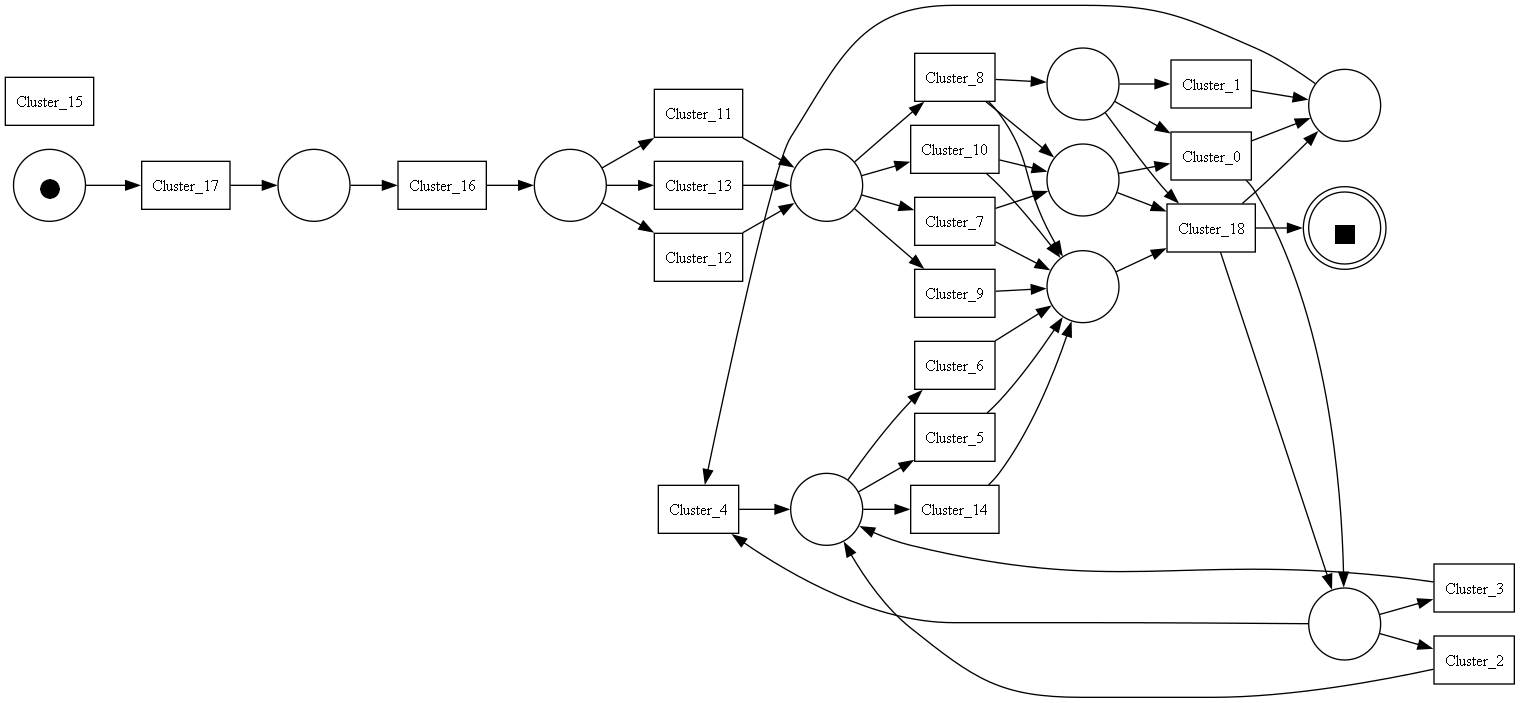

In [27]:
log = f.trace2eventlog(transformed_traces)
net, im, fm = pm4py.discover_petri_net_alpha(log)
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

##########
2
##########
Phase 3: Transforming traces to abstraction level 2...
  ✓ Transformed 101 traces


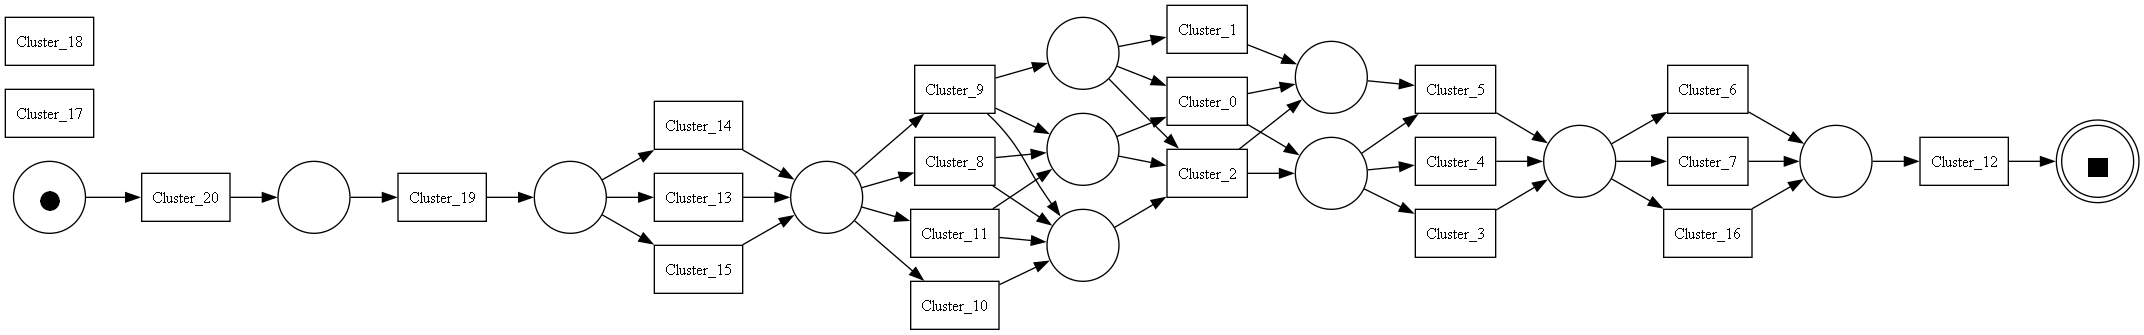

##########
3
##########
Phase 3: Transforming traces to abstraction level 3...
  ✓ Transformed 101 traces


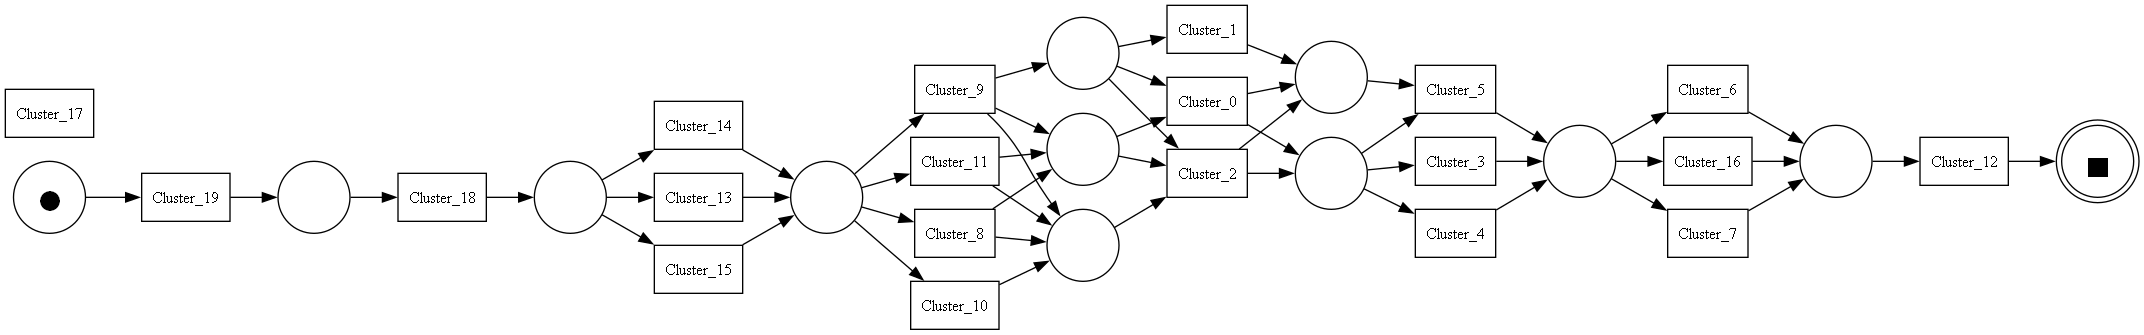

##########
4
##########
Phase 3: Transforming traces to abstraction level 4...
  ✓ Transformed 101 traces


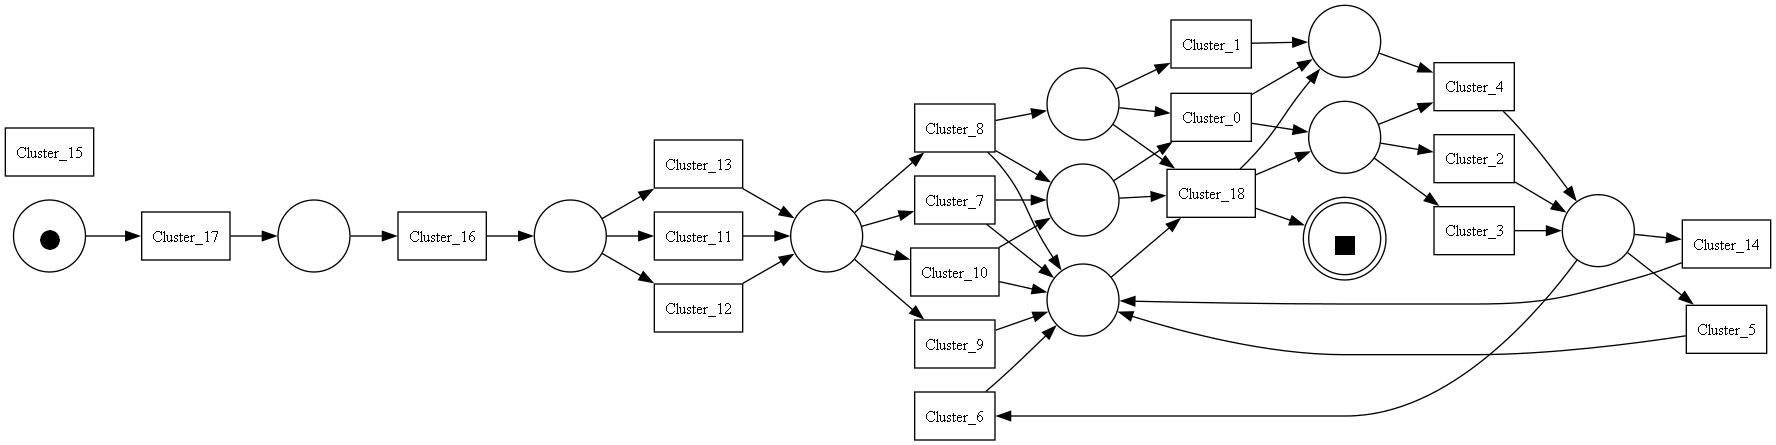

##########
5
##########
Phase 3: Transforming traces to abstraction level 5...
  ✓ Transformed 101 traces


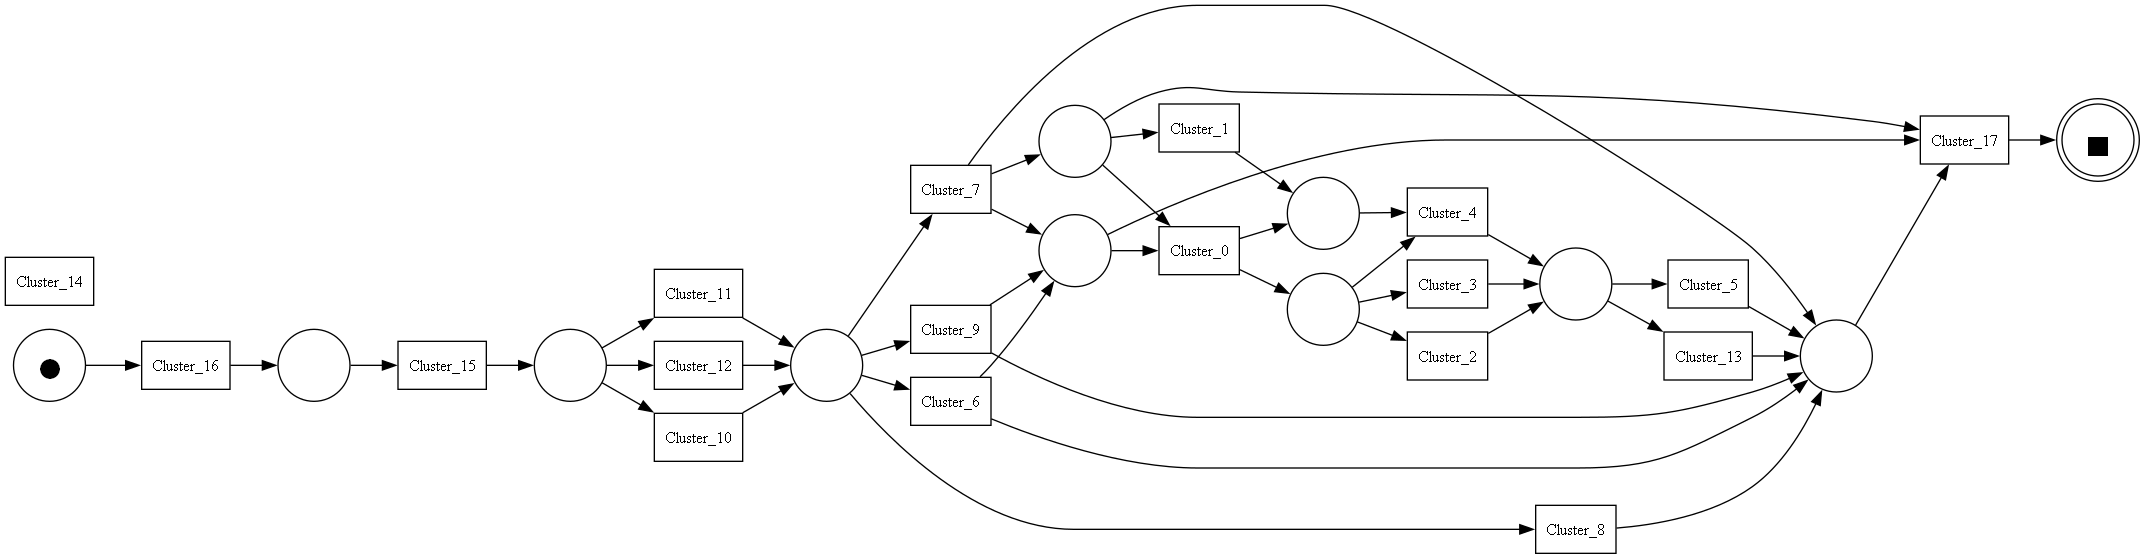

##########
6
##########
Phase 3: Transforming traces to abstraction level 6...
  ✓ Transformed 101 traces


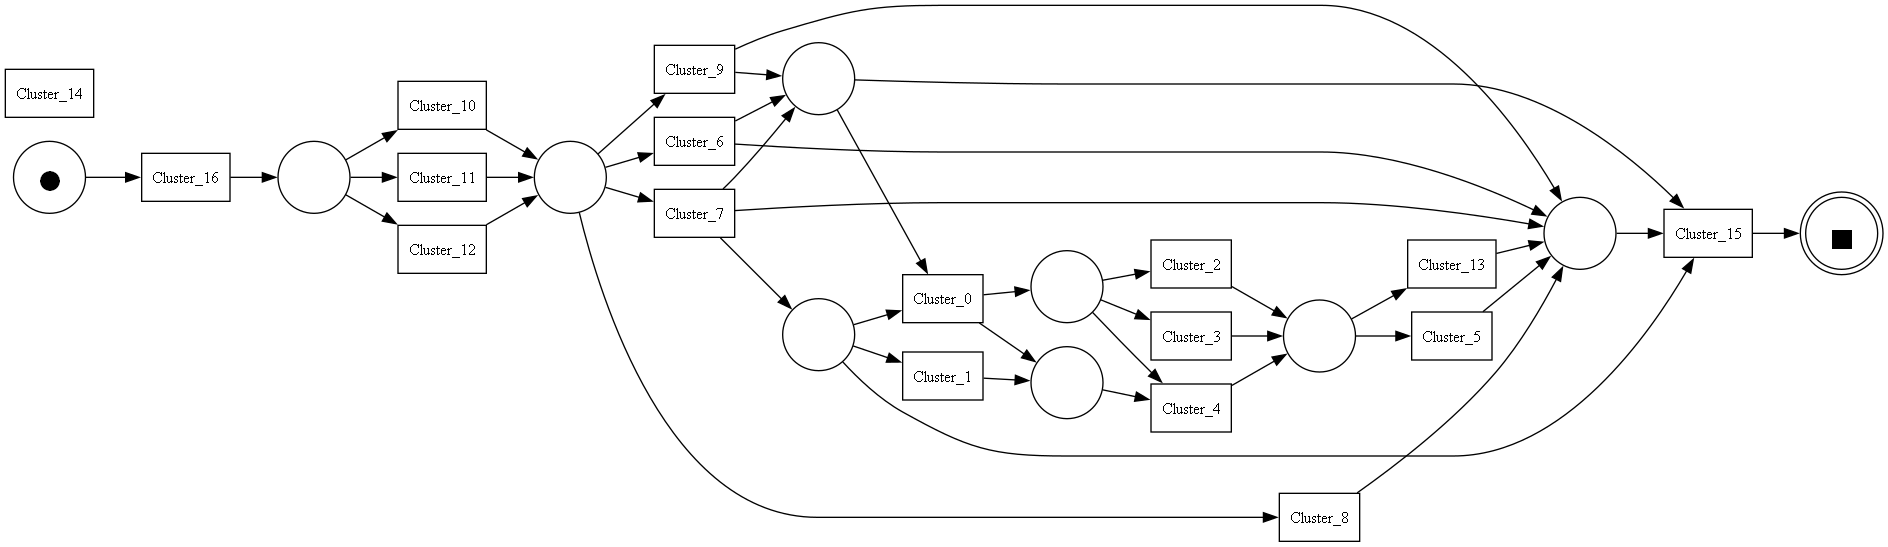

##########
7
##########
Phase 3: Transforming traces to abstraction level 7...
  ✓ Transformed 101 traces


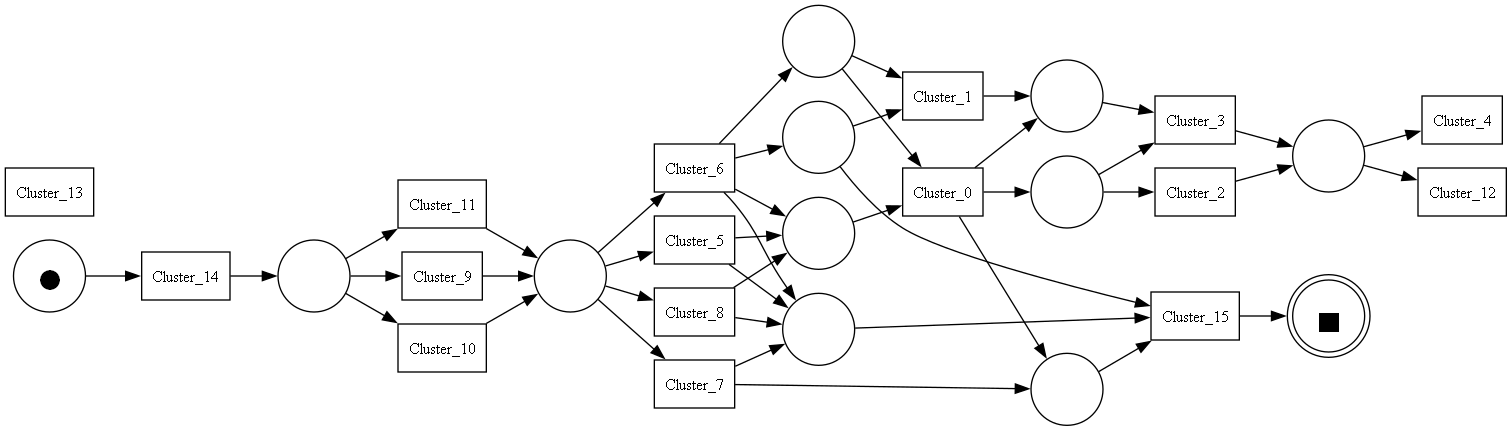

##########
8
##########
Phase 3: Transforming traces to abstraction level 8...
  ✓ Transformed 101 traces


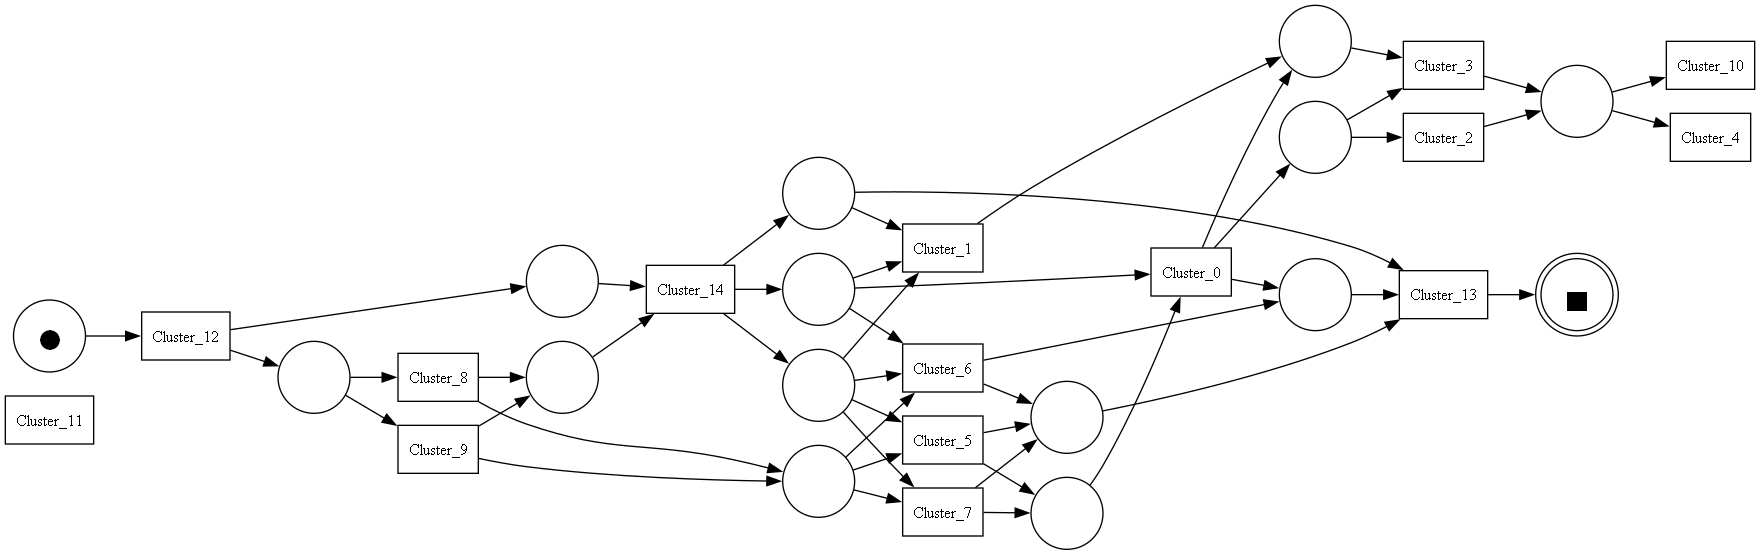

##########
9
##########
Phase 3: Transforming traces to abstraction level 9...
  ✓ Transformed 101 traces


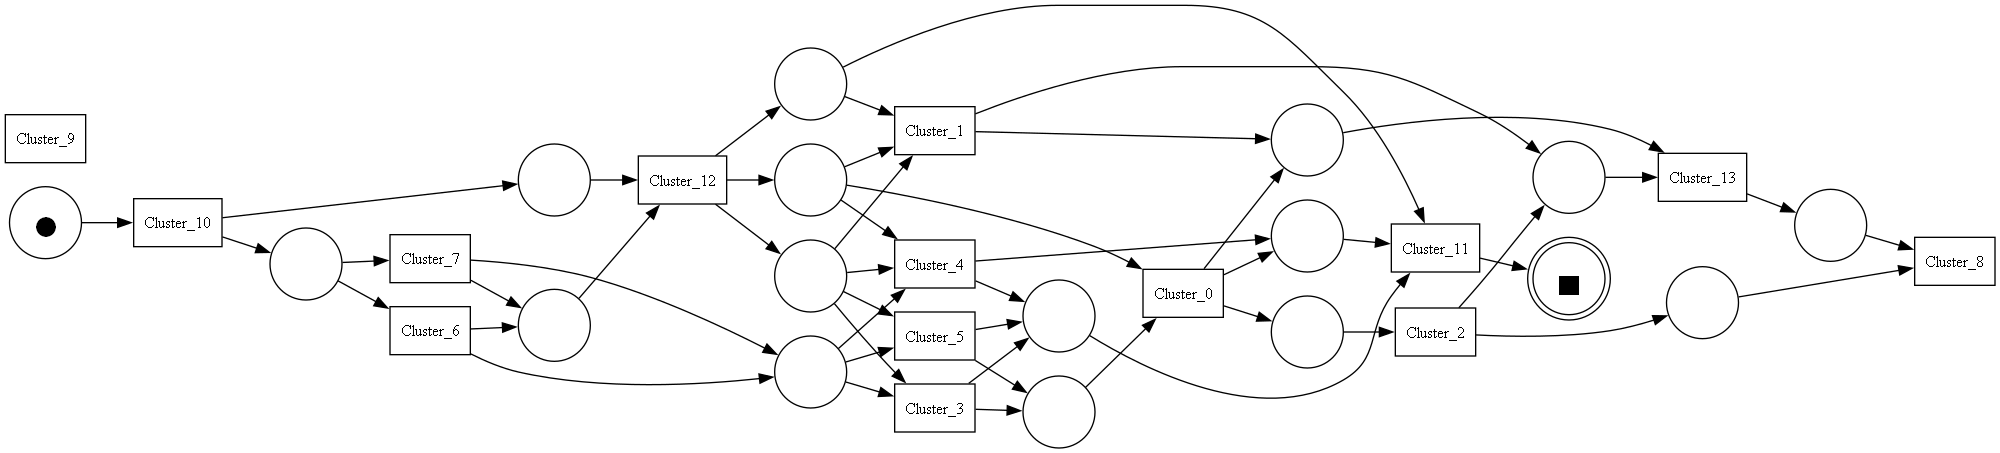

##########
10
##########
Phase 3: Transforming traces to abstraction level 10...
  ✓ Transformed 101 traces


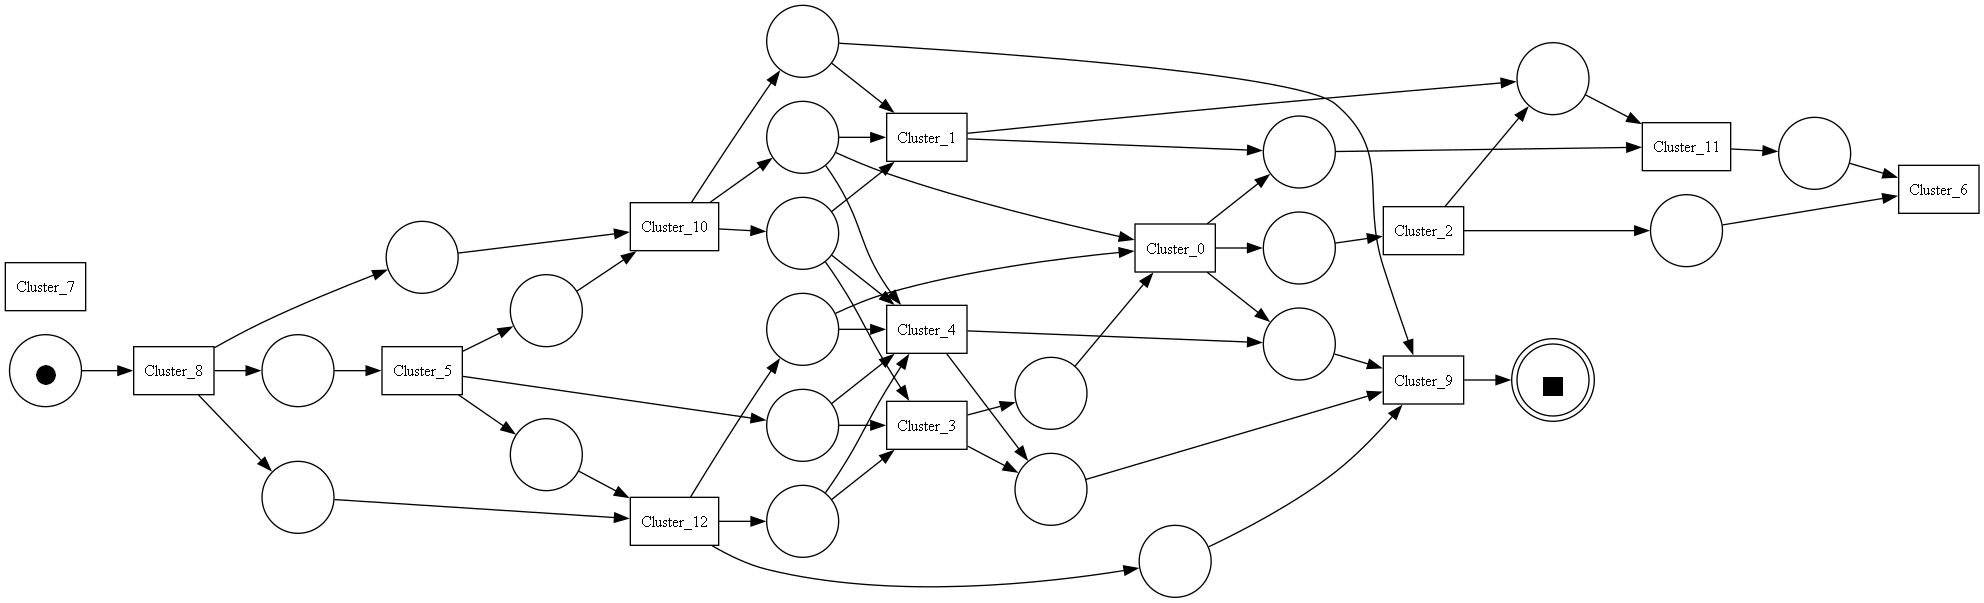

##########
11
##########
Phase 3: Transforming traces to abstraction level 11...
  ✓ Transformed 101 traces


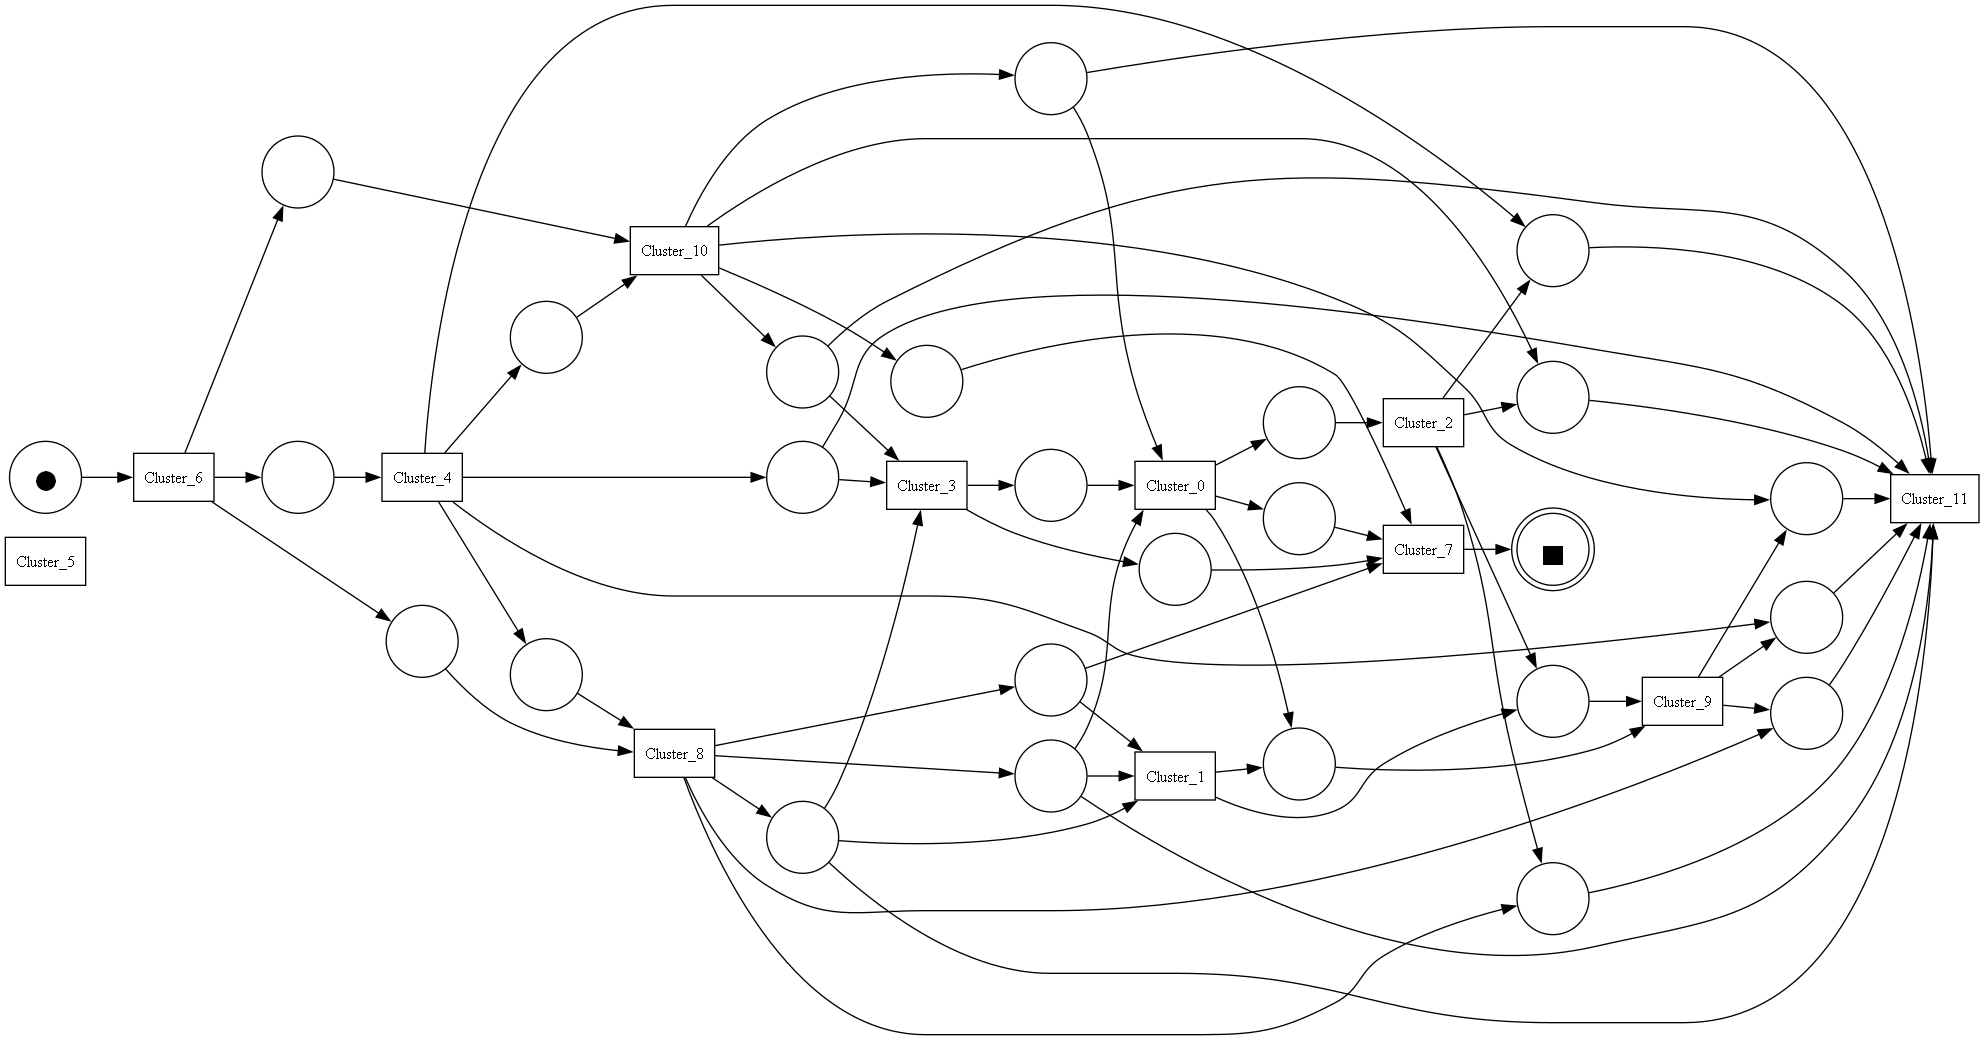

##########
12
##########
Phase 3: Transforming traces to abstraction level 12...
  ✓ Transformed 101 traces


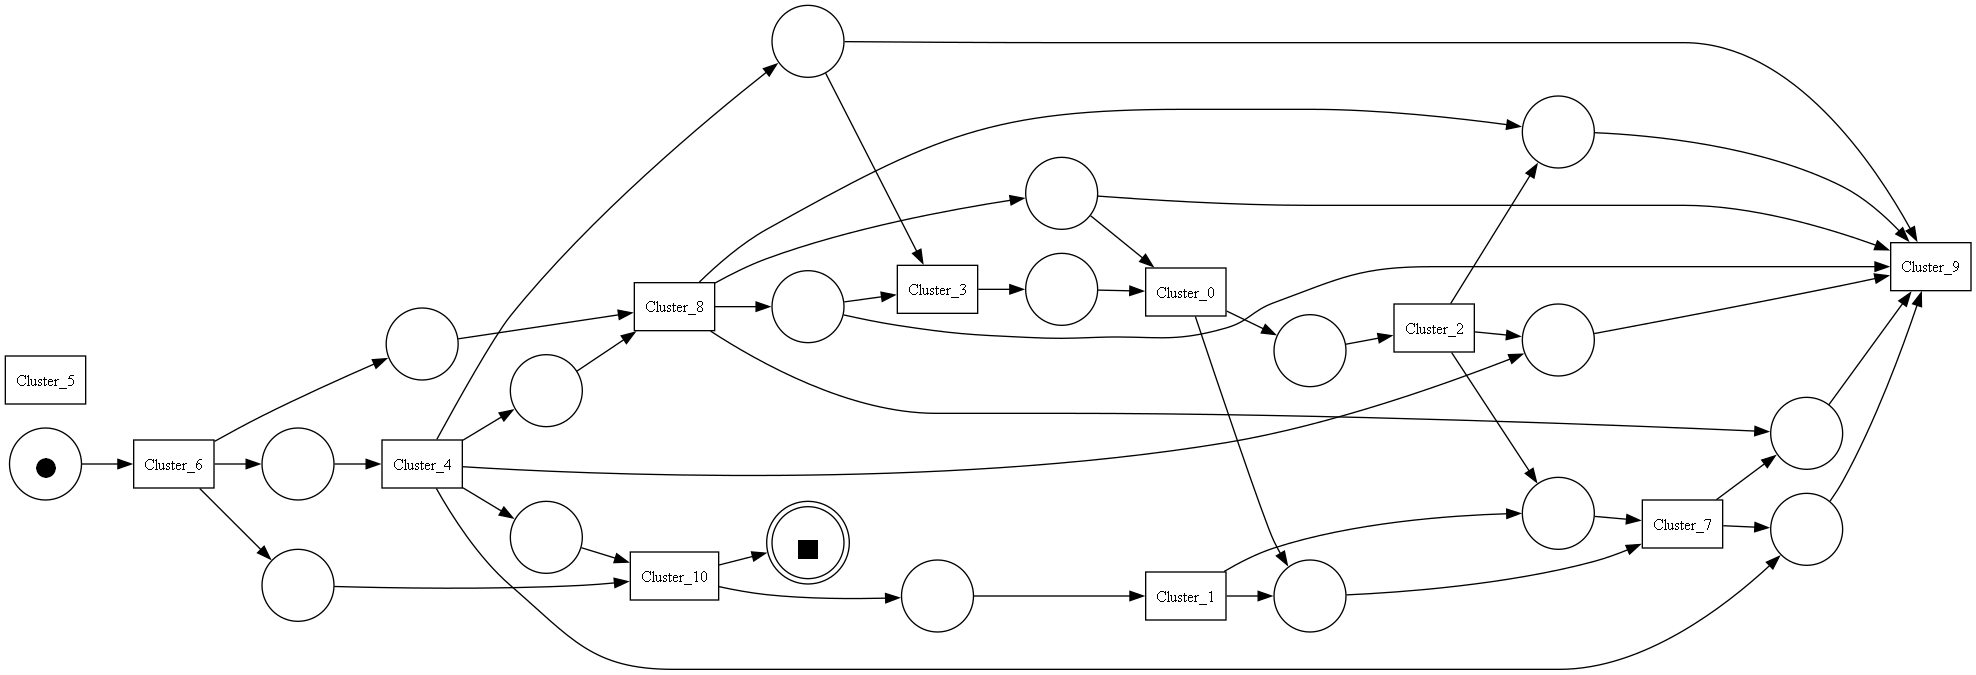

##########
13
##########
Phase 3: Transforming traces to abstraction level 13...
  ✓ Transformed 101 traces


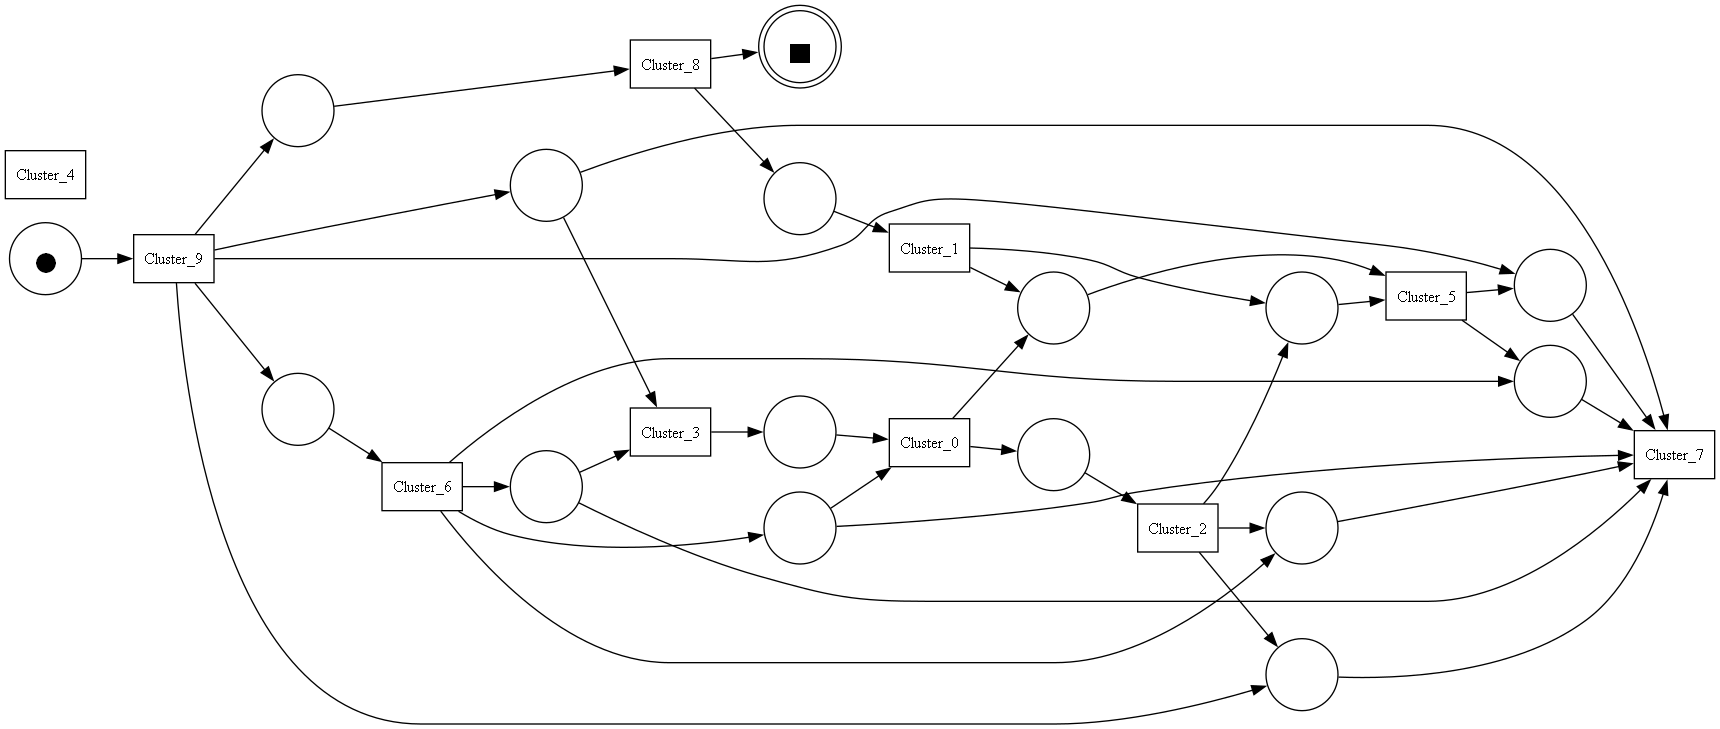

##########
14
##########
Phase 3: Transforming traces to abstraction level 14...
  ✓ Transformed 101 traces


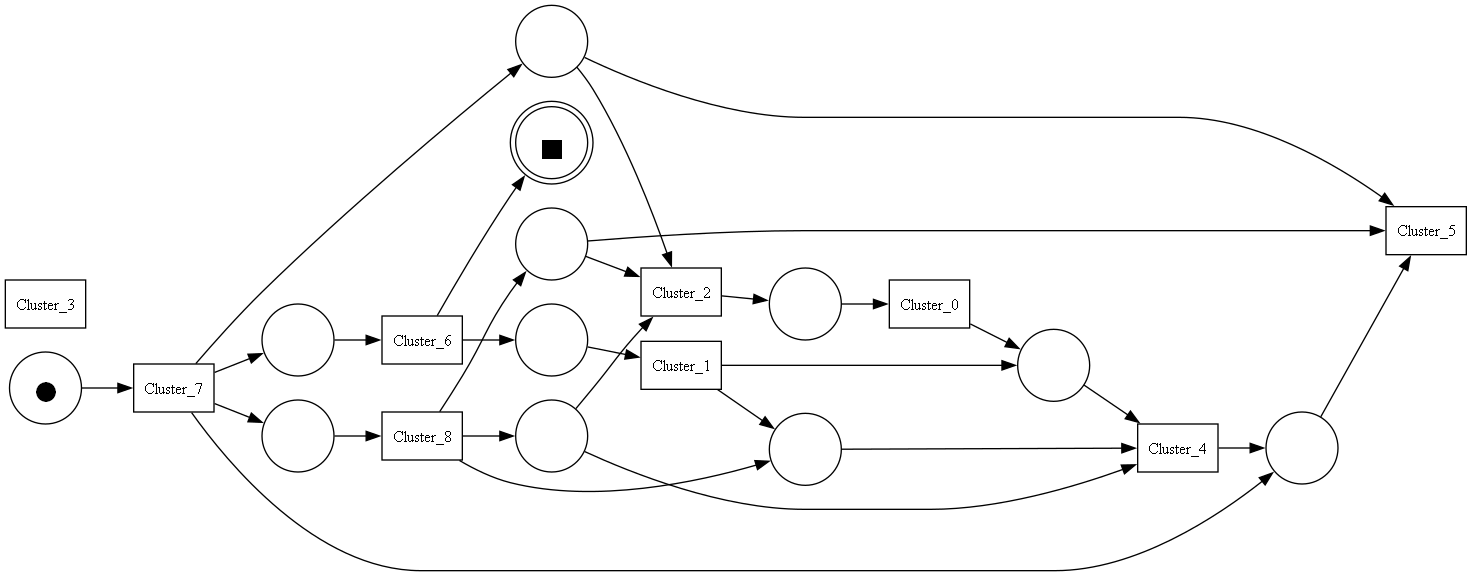

##########
15
##########
Phase 3: Transforming traces to abstraction level 15...
  ✓ Transformed 101 traces


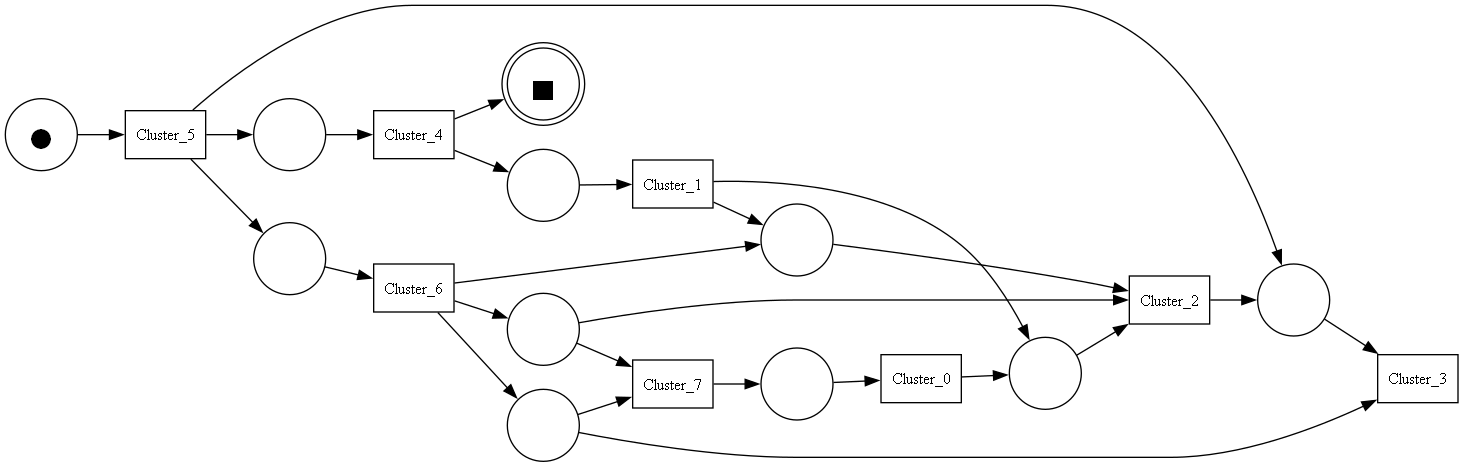

##########
16
##########
Phase 3: Transforming traces to abstraction level 16...
  ✓ Transformed 101 traces


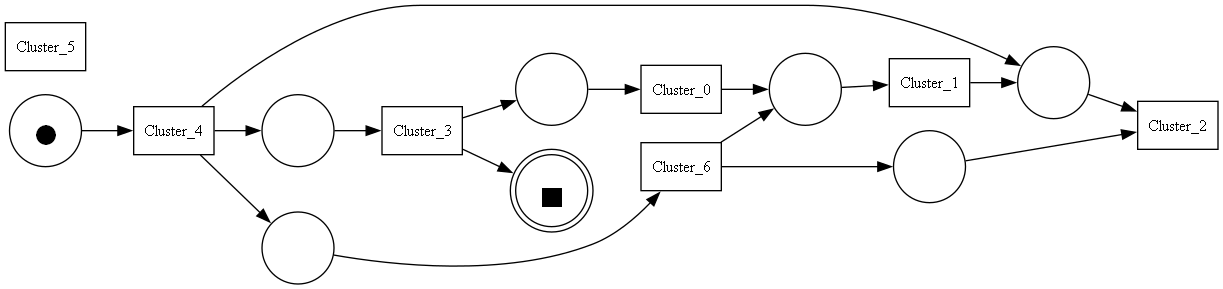

##########
17
##########
Phase 3: Transforming traces to abstraction level 17...
  ✓ Transformed 101 traces


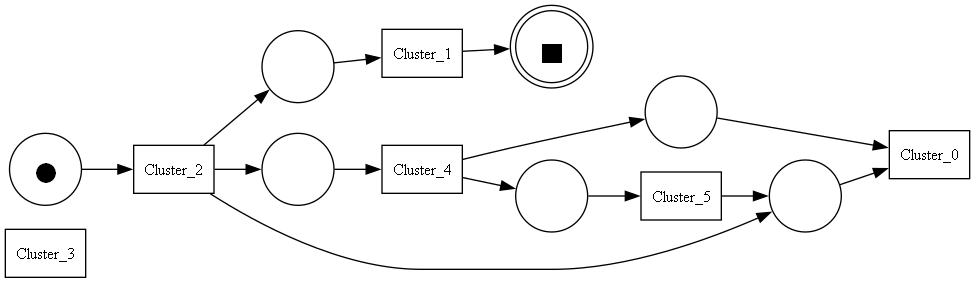

##########
18
##########
Phase 3: Transforming traces to abstraction level 18...
  ✓ Transformed 101 traces


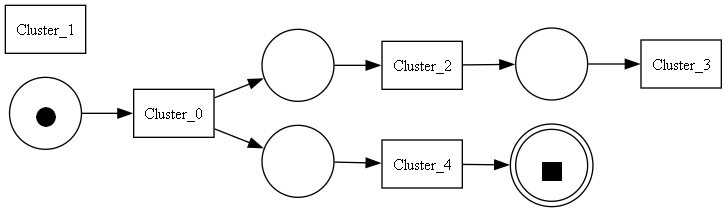

##########
19
##########
Phase 3: Transforming traces to abstraction level 19...
  ✓ Transformed 101 traces


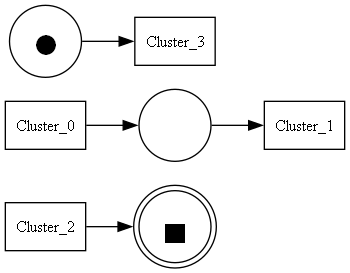

In [29]:
for i in range(2,20):
    print("#"*10)
    print(i)
    print("#"*10)
    transformed_traces = model.transform(traces, abstraction_level=i)
    log = f.trace2eventlog(transformed_traces)
    net, im, fm = pm4py.discover_petri_net_alpha(log)
    gviz = pn_visualizer.apply(net, im, fm)
    pn_visualizer.view(gviz)